In [613]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import register_matplotlib_converters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

In [614]:
df = pd.read_csv('../../dataset1/time_series_covid19_confirmed_global.csv')
data = df.iloc[:, 4:]
state = df.iloc[:,0]
country = df.iloc[:,1]
last_data = data.iloc[:, -1]

In [636]:
index = 64 # 64 83 145 217 218 255 92
print("选择的国家是：{}".format(country[index]))
print("选择的地区是：{}".format(state[index]))
rows = list(range(59, 71)) + list(range(73, 89)) + list(range(90, 93))
print("选择的地区是：{}".format(state[rows[25]]))

选择的国家是：China
选择的地区是：Guangdong
选择的地区是：Sichuan


In [616]:
series = []


china_data = data.iloc[rows,:].diff(axis=1).iloc[:, 1:]

for row_index, row in china_data.iterrows():
    daily = data.loc[row_index].diff()
    daily = daily.to_numpy()
    length = len(daily)
    start_date = 0
    # series = np.expand_dims(daily[start_date: start_date + 10], axis=0)
    # start_date += 5
    # print(series)
    while (start_date < length-10):
        daily_data = np.asarray(daily[start_date: start_date + 10])
        series.append(np.nan_to_num(daily_data))
        start_date += 1
    print(start_date)
# test_series = []
# test_v2 =[]
# for row_index, row in china_data.iterrows():
#     daily = data.loc[row_index].diff()
#     daily = daily.to_numpy()
#     length = len(daily)
#     # print(length)
#     start_date = 700
#     # series = np.expand_dims(daily[start_date: start_date + 10], axis=0)
#     # start_date += 5
#     # print(series)
#     test_ser = []
#     while (start_date < length-10):
#         daily_data = np.asarray(daily[start_date: start_date + 10])
#         test_ser.append(np.nan_to_num(daily_data))
#         test_v2.append(np.nan_to_num(daily_data))
#         start_date += 5
#     test_series.append(test_ser)
# #     print(len(test_ser))
# # print(len(test_v2))

842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842
842


In [617]:
series_pd = pd.DataFrame(series)
series_pd

,0,1,2,3,4,5,6,7,8,9
0,0.0,8.0,6.0,24.0,21.0,10.0,36.0,46.0,48.0,37.0
1,8.0,6.0,24.0,21.0,10.0,36.0,46.0,48.0,37.0,60.0
2,6.0,24.0,21.0,10.0,36.0,46.0,48.0,37.0,60.0,43.0
3,24.0,21.0,10.0,36.0,46.0,48.0,37.0,60.0,43.0,68.0
4,21.0,10.0,36.0,46.0,48.0,37.0,60.0,43.0,68.0,72.0
...,...,...,...,...,...,...,...,...,...,...
26097,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
26098,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
26099,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
26100,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0


In [618]:
def load_embeddings(wine_raw):
#     """
#     Loading the wine dataset in pandas dataframe
#     :return: scaled data
#     """
#     # loading wine dataset
#     wine_raw = pd.read_csv("./data/wine-clustering.csv")

#     # checking data shape
#     row, col = wine_raw.shape
#     print(f'There are {row} rows and {col} columns') 
#     print(wine_raw.head(10))

    # to work on copy of the data
    wine_raw_scaled = wine_raw.copy()

    # Scaling the data to keep the different attributes in same range.
    wine_raw_scaled[wine_raw_scaled.columns] = StandardScaler().fit_transform(wine_raw_scaled)
    print(wine_raw_scaled.describe())

    return wine_raw_scaled


def pca_embeddings(df_scaled):
    """To reduce the dimensions of the wine dataset we use Principal Component Analysis (PCA).
    Here we reduce it from 13 dimensions to 2.

    :param df_scaled: scaled data
    :return: pca result, pca for plotting graph
    """

    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(df_scaled)
    print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
        np.sum(pca_2.explained_variance_ratio_)))

    # Results from pca.components_
    dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=df_scaled.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)
    
    print("\n*************** Most important features *************************")
    print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
    print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
    print("\n******************************************************************")

    return pca_2_result, pca_2


def kmean_hyper_param_tuning(data):
    """
    Hyper parameter tuning to select the best from all the parameters on the basis of silhouette_score.

    :param data: dimensionality reduced data after applying PCA
    :return: best number of clusters for the model (used for KMeans n_clusters)
    """
    # candidate values for our number of cluster
#     parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
    parameters = [3, 4, 5, 10, 15, 20, 25, 30, 35, 40]

    # instantiating ParameterGrid, pass number of clusters as input
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()     # instantiating KMeans model
    silhouette_scores = []

    # evaluation based on silhouette_score
    for p in parameter_grid:
        kmeans_model.set_params(**p)    # set current hyper parameter
        kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p

        ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
        silhouette_scores += [ss]       # store all the scores

        print('Parameter:', p, 'Score', ss)

        # check p which has the best score
        if ss > best_score:
            best_score = ss
            best_grid = p

    # plotting silhouette score
    plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), list(parameters))
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']


def visualizing_results(pca_result, label, centroids_pca):
    """ Visualizing the clusters

    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=label, alpha=0.5, s=200)  # plot different colors per cluster
    plt.title('Wine clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()

In [637]:
print("1. Loading Wine dataset\n")
data_scaled = load_embeddings(series_pd)

1. Loading Wine dataset

                  0             1             2             3             4  \
count  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04   
mean  -6.758378e-15  3.865688e-15 -1.234996e-15  5.028328e-15 -8.291515e-15   
std    1.000019e+00  1.000019e+00  1.000019e+00  1.000019e+00  1.000019e+00   
min   -6.512618e+00 -6.512191e+00 -6.511845e+00 -6.511763e+00 -6.511650e+00   
25%   -6.411932e-02 -6.422974e-02 -6.428695e-02 -6.427743e-02 -6.423644e-02   
50%   -6.411932e-02 -6.422974e-02 -6.428695e-02 -6.427743e-02 -6.423644e-02   
75%   -5.317111e-02 -5.328243e-02 -5.334033e-02 -5.333093e-02 -5.329007e-02   
max    6.003063e+01  6.002551e+01  6.002170e+01  6.002104e+01  6.002040e+01   

                  5             6             7             8             9  
count  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04  
mean   4.260249e-15 -1.560555e-15 -6.523791e-15  3.286288e-15  3.361366e-15  
std    1.000019e+00  1.000019

,0,1,2,3,4,5,6,7,8,9
0,-0.064119,0.023349,0.001393,0.198438,0.165637,0.045281,0.329974,0.439565,0.461633,0.341469
1,0.023466,0.001454,0.198432,0.165599,0.045227,0.329882,0.439435,0.461457,0.341221,0.593257
2,0.001570,0.198506,0.165592,0.045188,0.329833,0.439344,0.461327,0.341049,0.592992,0.407153
3,0.198638,0.165664,0.045179,0.329796,0.439297,0.461236,0.340920,0.592810,0.406900,0.680836
4,0.165793,0.045243,0.329791,0.439261,0.461189,0.340828,0.592681,0.406726,0.680565,0.724625
...,...,...,...,...,...,...,...,...,...,...
26097,-0.053171,-0.064230,-0.042394,-0.064277,-0.064236,-0.064181,-0.064087,-0.042065,-0.063803,-0.063582
26098,-0.064119,-0.042335,-0.064287,-0.064277,-0.064236,-0.064181,-0.042194,-0.063957,-0.063803,-0.052635
26099,-0.042223,-0.064230,-0.064287,-0.064277,-0.064236,-0.042289,-0.064087,-0.063957,-0.052856,-0.063582
26100,-0.064119,-0.064230,-0.064287,-0.064277,-0.042344,-0.064181,-0.064087,-0.053011,-0.063803,-0.052635


In [620]:
print("\n\n2. Reducing via PCA\n")
pca_result, pca_2 = pca_embeddings(data_scaled)



2. Reducing via PCA

Explained variation per principal component: [0.69156596 0.07346212]
Cumulative variance explained by 2 principal components: 76.50%


              0         1         2         3         4         5         6  \
PC_1  0.301227  0.312329  0.317882  0.323286  0.325776  0.325776  0.323287   
PC_2  0.496181  0.350793  0.267890  0.202338  0.134870  0.135063  0.202480   

             7         8         9  
PC_1  0.317887  0.312350  0.301266  
PC_2  0.267905  0.350628  0.495882  

*************** Most important features *************************
As per PC 1:
 0    0.301227
1    0.312329
2    0.317882
3    0.323286
4    0.325776
5    0.325776
6    0.323287
7    0.317887
8    0.312350
9    0.301266
Name: PC_1, dtype: float64


As per PC 2:
 0    0.496181
1    0.350793
8    0.350628
9    0.495882
Name: PC_2, dtype: float64

******************************************************************




3. HyperTuning the Parameter for KMeans

Parameter: {'n_clusters': 3} Score 0.9939399437357814
Parameter: {'n_clusters': 4} Score 0.9930429742273592
Parameter: {'n_clusters': 5} Score 0.9931336321294901
Parameter: {'n_clusters': 10} Score 0.9910785571449037
Parameter: {'n_clusters': 15} Score 0.981240472122839
Parameter: {'n_clusters': 20} Score 0.9817232292842963
Parameter: {'n_clusters': 25} Score 0.9805570644260654
Parameter: {'n_clusters': 30} Score 0.9478078549437072
Parameter: {'n_clusters': 35} Score 0.931436533241429
Parameter: {'n_clusters': 40} Score 0.942172127532531


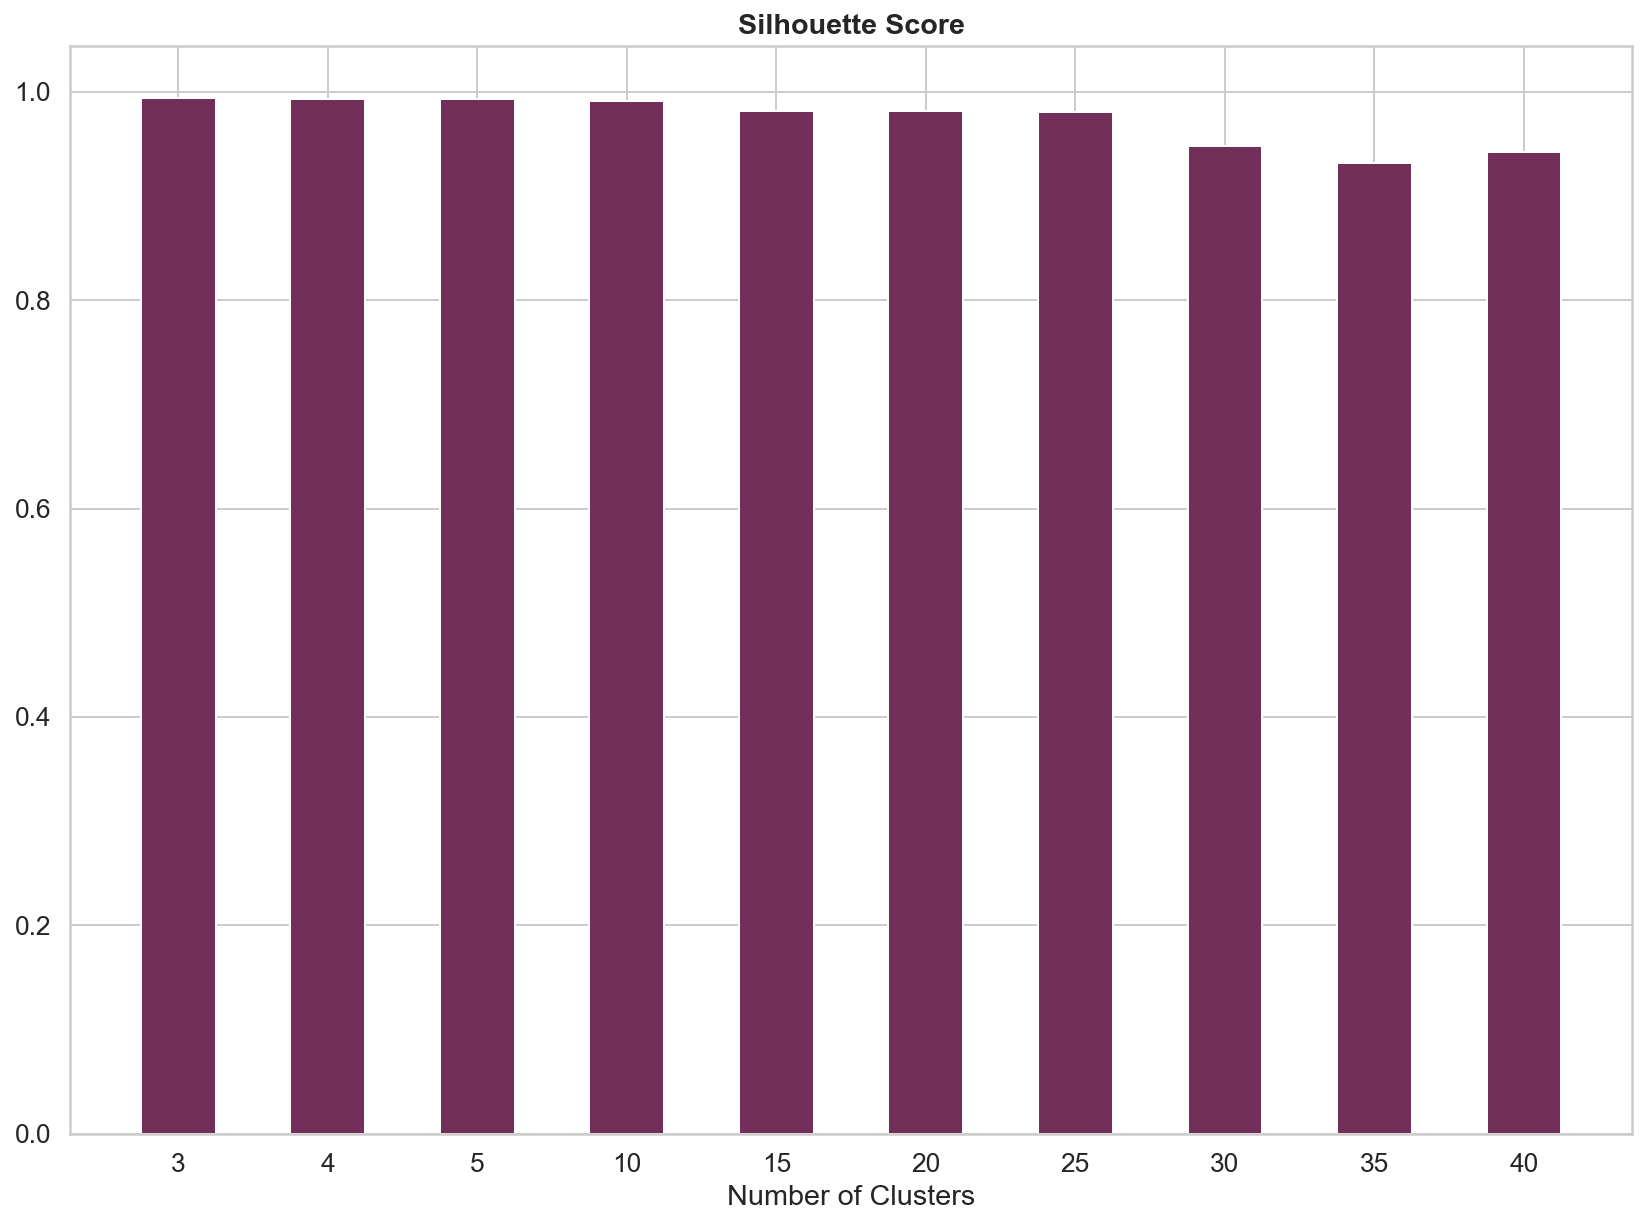

optimum num of clusters = 3


In [621]:
print("\n\n3. HyperTuning the Parameter for KMeans\n")
optimum_num_clusters = kmean_hyper_param_tuning(data_scaled)
print("optimum num of clusters =", optimum_num_clusters)

In [622]:
# fitting KMeans
# kmeans = KMeans(n_clusters=optimum_num_clusters)
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)



4. Visualizing the data
                  0             1             2             3             4  \
count  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04   
mean  -6.758378e-15  3.865688e-15 -1.234996e-15  5.028328e-15 -8.291515e-15   
std    1.000019e+00  1.000019e+00  1.000019e+00  1.000019e+00  1.000019e+00   
min   -6.512618e+00 -6.512191e+00 -6.511845e+00 -6.511763e+00 -6.511650e+00   
25%   -6.411932e-02 -6.422974e-02 -6.428695e-02 -6.427743e-02 -6.423644e-02   
50%   -6.411932e-02 -6.422974e-02 -6.428695e-02 -6.427743e-02 -6.423644e-02   
75%   -5.317111e-02 -5.328243e-02 -5.334033e-02 -5.333093e-02 -5.329007e-02   
max    6.003063e+01  6.002551e+01  6.002170e+01  6.002104e+01  6.002040e+01   

                  5             6             7             8             9  
count  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04  
mean   4.260249e-15 -1.560555e-15 -6.523791e-15  3.286288e-15  3.361366e-15  
std    1.000019e+00  1.00001

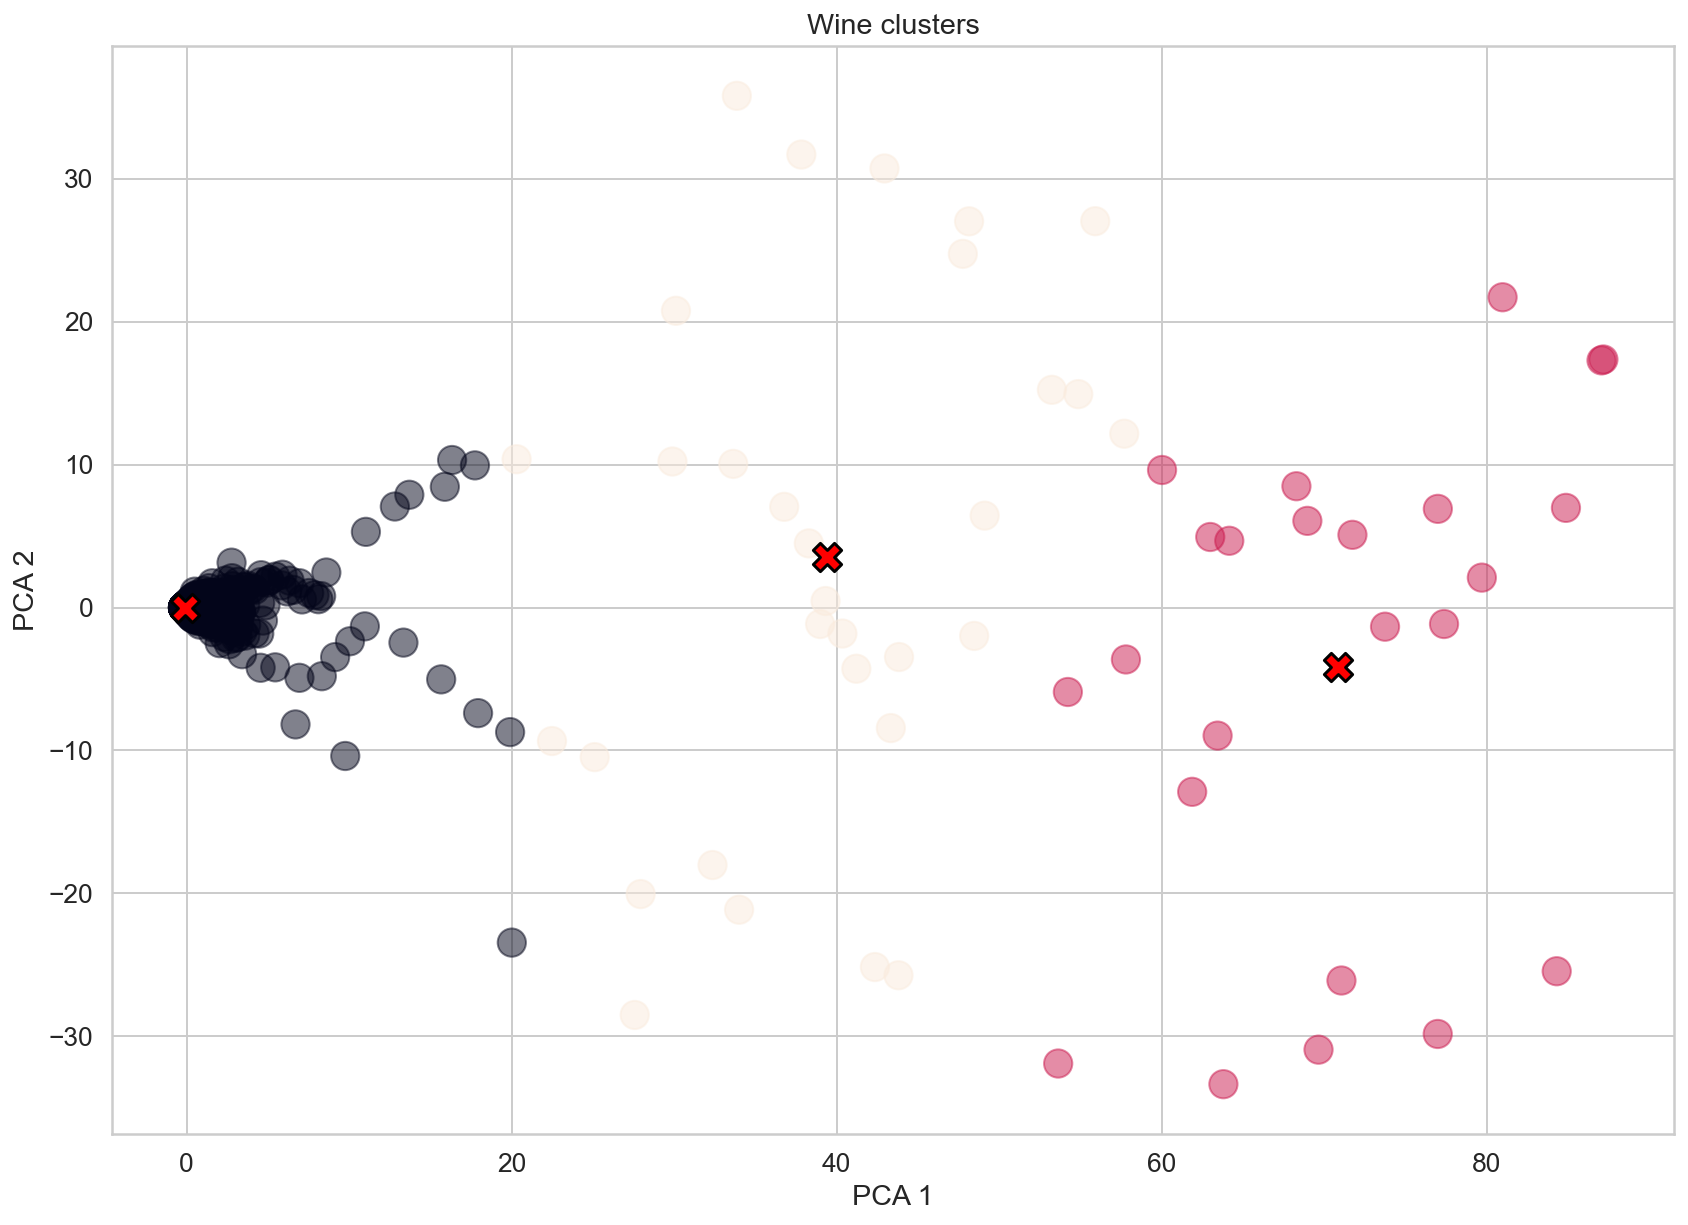

[[-1.12197592e-01 -3.59396607e-04]
 [ 7.08706268e+01 -4.17717736e+00]
 [ 3.94037305e+01  3.53591807e+00]]


In [623]:
print("\n\n4. Visualizing the data")
# visualizing_results(pca_result, kmeans.labels_, centroids_pca)
pre = kmeans.predict(load_embeddings(series_pd))
visualizing_results(pca_result, pre, centroids_pca)
print(centroids_pca)

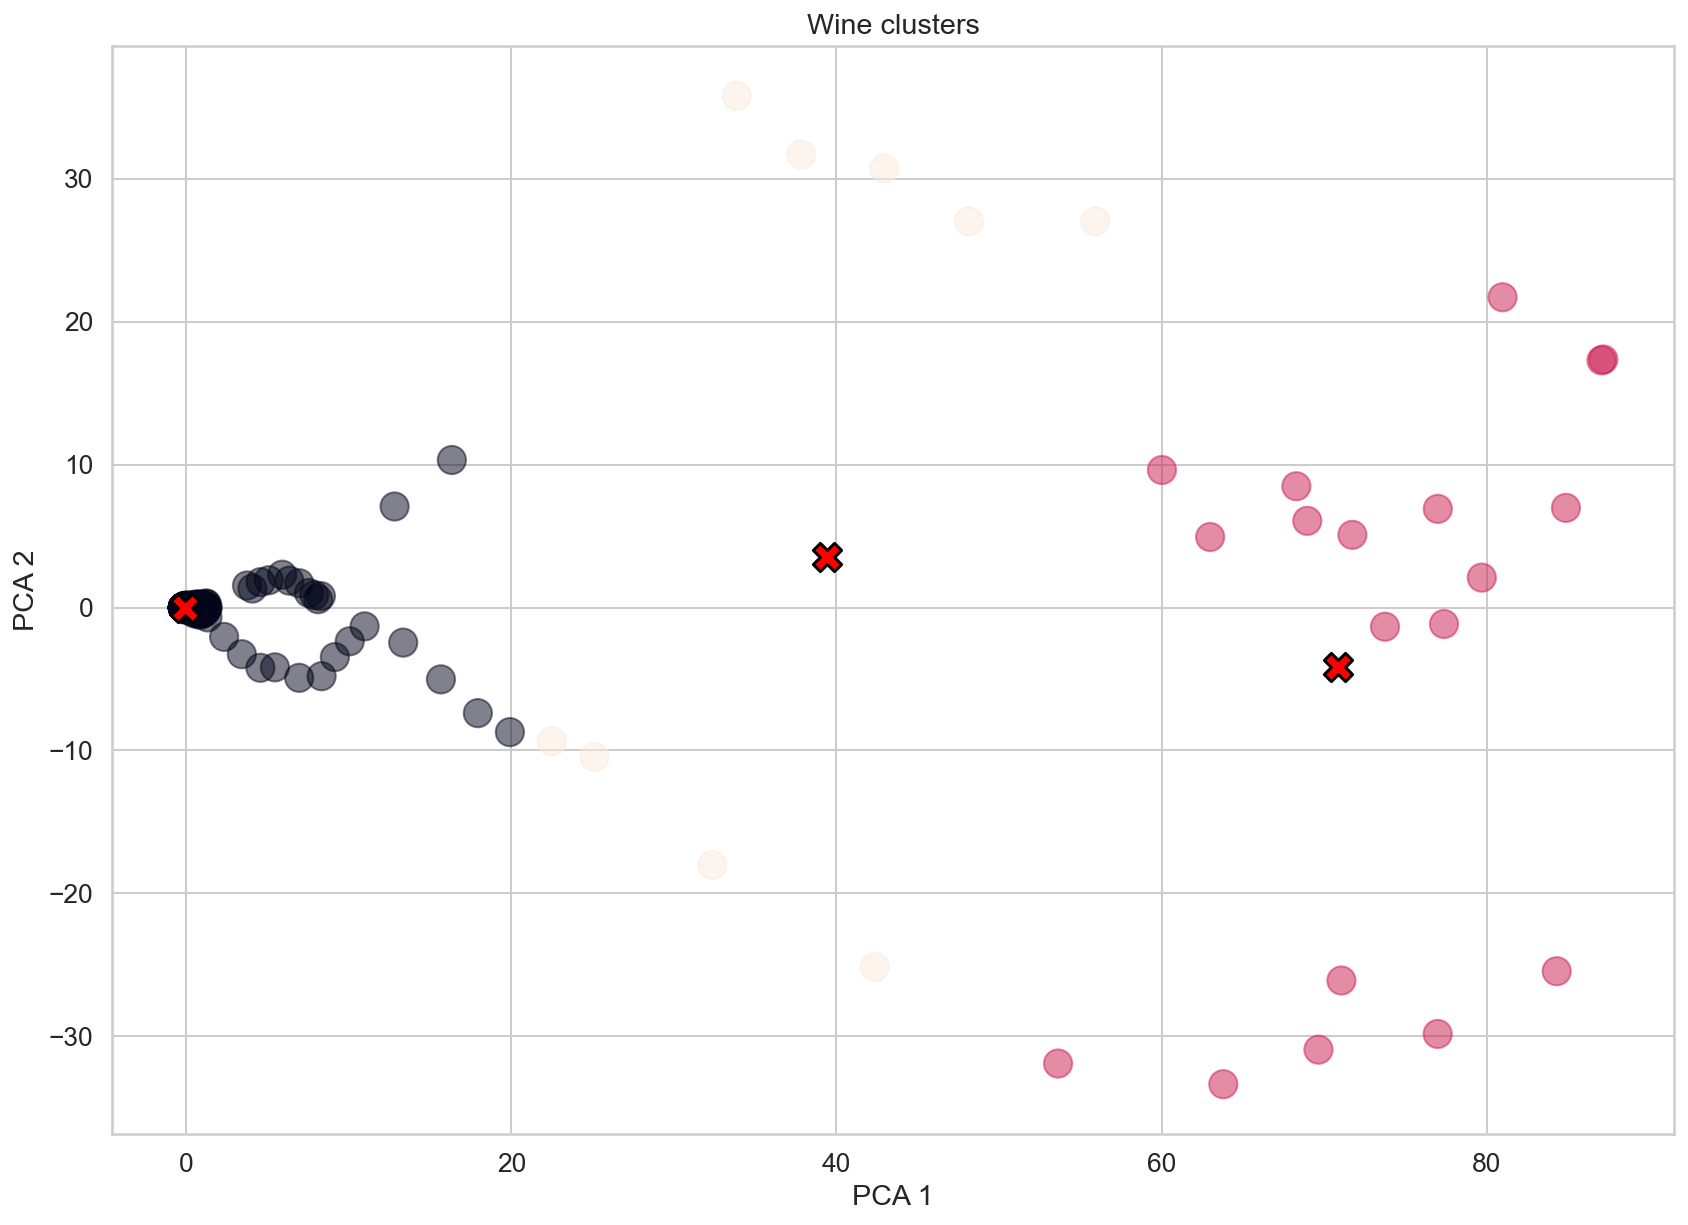

23


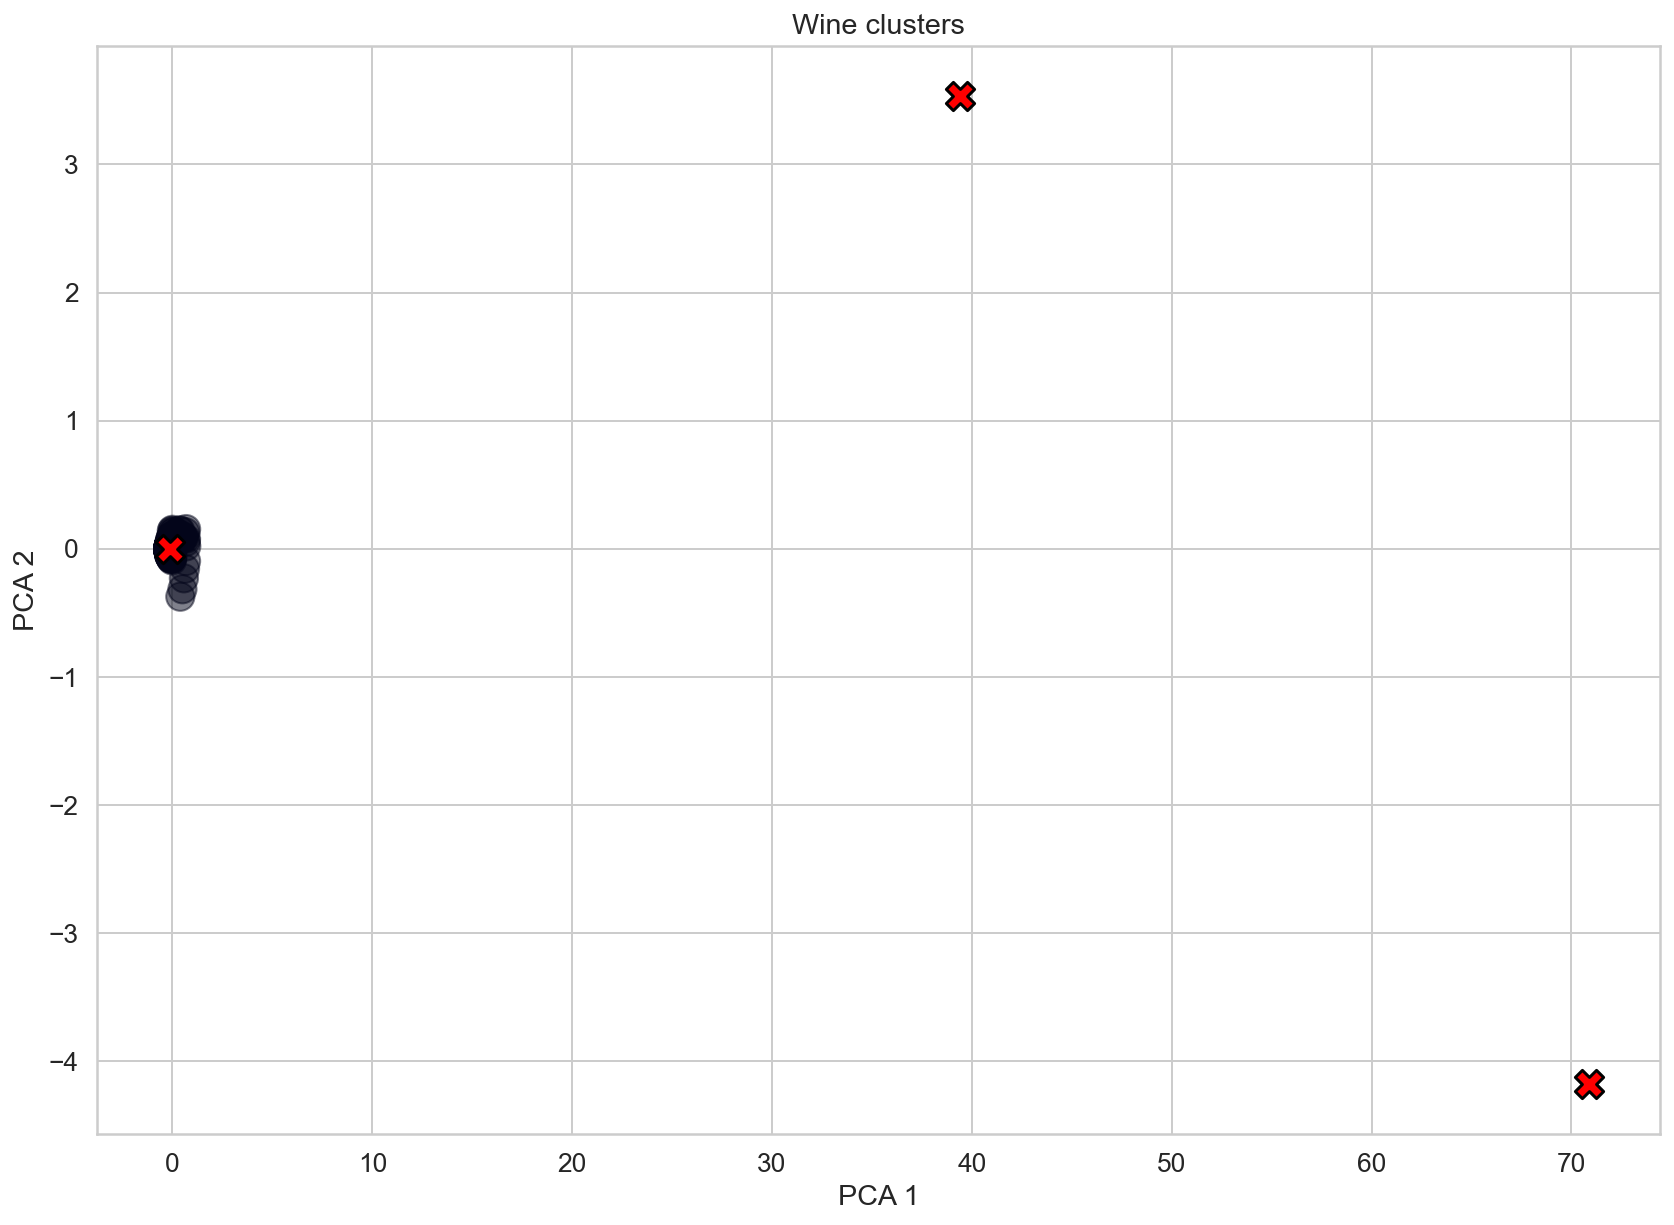

24


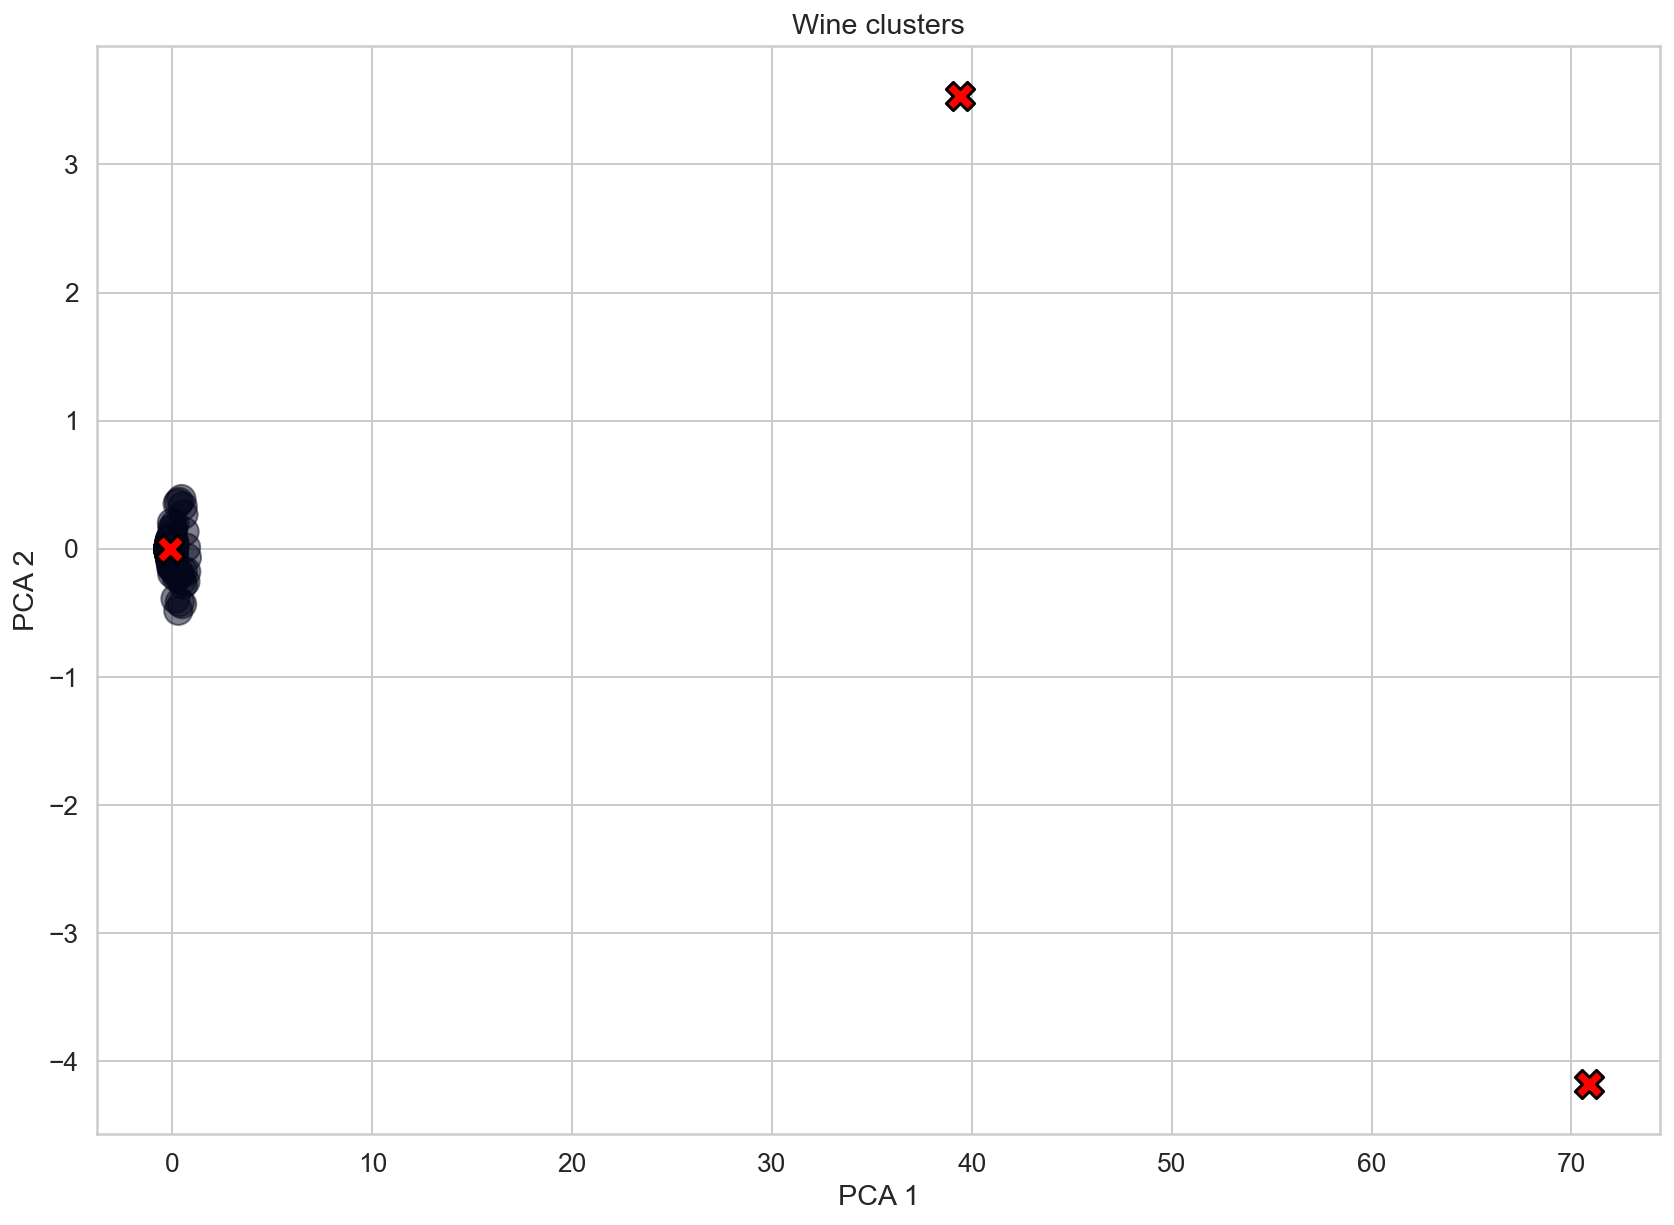

25


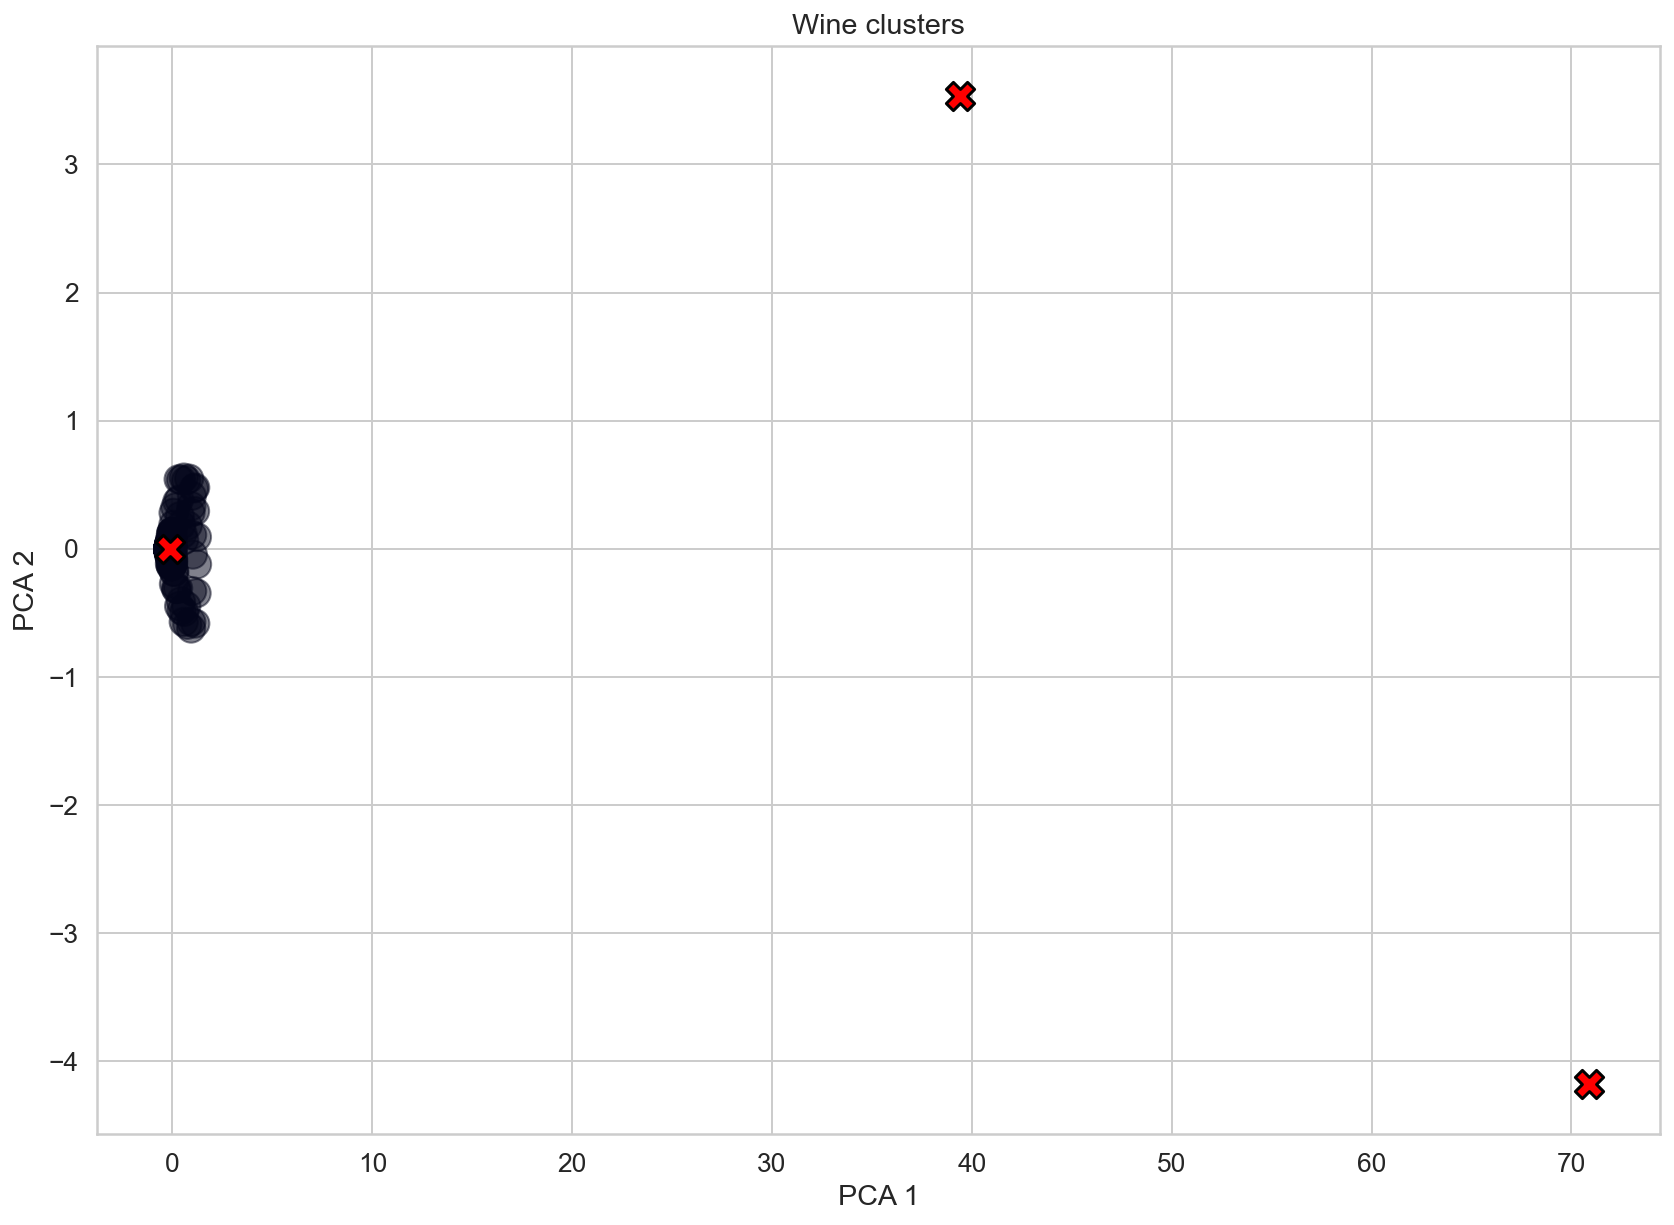

26


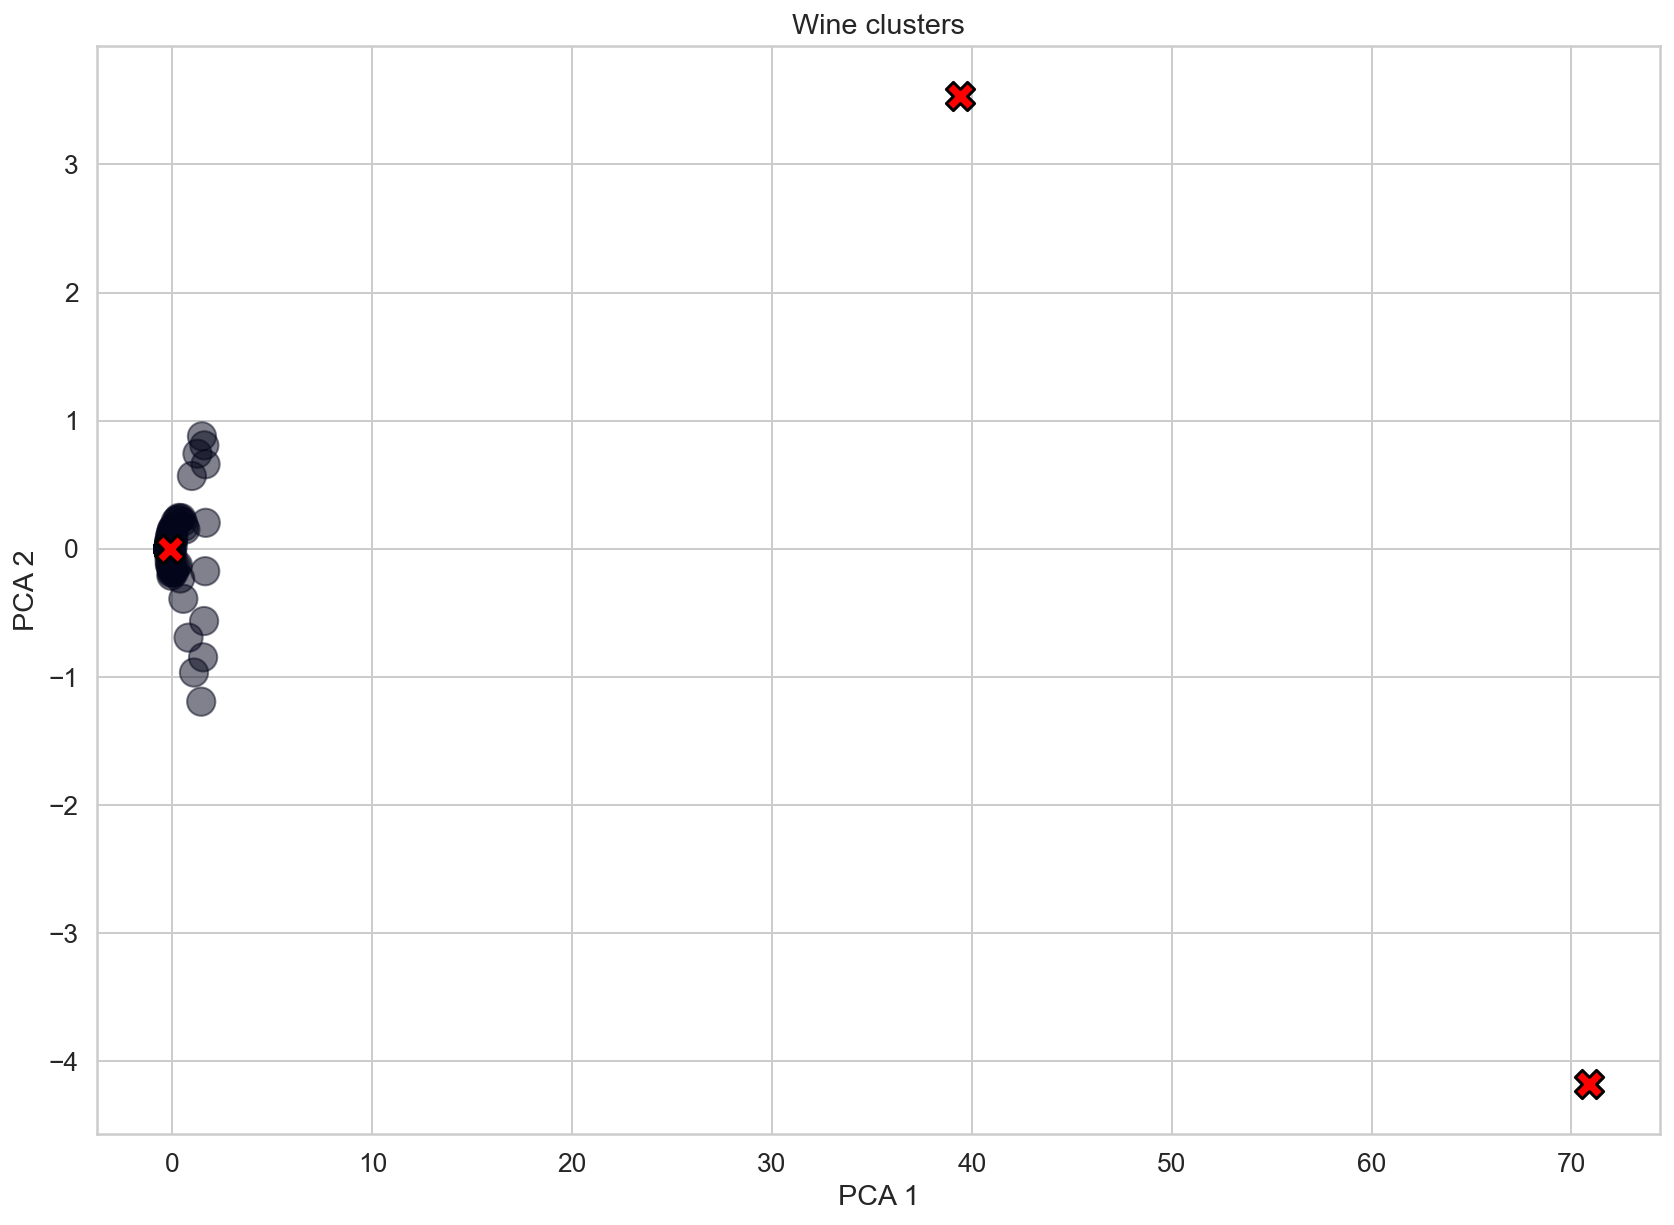

27


In [634]:

# 16 和 23
for i in range(23, 28):
    # print(len(test))
    # print(test)
    data_test = data_scaled[i * length  : (i+1) * length]

    # data_test = load_embeddings(test)
#     pca_result, pca_2 = pca_embeddings(data_test)

    pre = kmeans.labels_[i * length  : (i+1) * length]
    pca_res = pca_result[i * length : (i+1) * length]

    centroids = kmeans.cluster_centers_
    centroids_pca = pca_2.transform(centroids)
    visualizing_results(pca_res, pre, centroids_pca)
    print(i)
    # print(centroids_pca)
    # break


#     pca_result, pca_2 = pca_embeddings(data_test)

# pre = kmeans.predict(load_embeddings(series_pd))
# pca_res = pca_2.transform(data_scaled)
#
# centroids = kmeans.cluster_centers_
# centroids_pca = pca_2.transform(centroids)
# visualizing_results(pca_res, pre, centroids_pca)
#
# pre = kmeans.predict(load_embeddings(series_pd[:5000]))
# pca_res = pca_2.transform(data_scaled[:5000])
#
# centroids = kmeans.cluster_centers_
# centroids_pca = pca_2.transform(centroids)
# visualizing_results(pca_res, pre, centroids_pca)
#
#
# pre = kmeans.predict(load_embeddings(series_pd[5000:]))
# pca_res = pca_2.transform(data_scaled[5000:])
#
# centroids = kmeans.cluster_centers_
# centroids_pca = pca_2.transform(centroids)
# visualizing_results(pca_res, pre, centroids_pca)
#
# print(pre)
# print(centroids_pca)

In [625]:
# for test in test_series[30:]:
#     # print(len(test))
#     # print(test)
#     test = pd.DataFrame(test)
#
#     print(test.T.mean())
#
#     data_test = load_embeddings(test)
# #     pca_result, pca_2 = pca_embeddings(data_test)
#
#     pre = kmeans.predict(data_test)
#     pca_res = pca_2.transform(data_test)
#
#     centroids = kmeans.cluster_centers_
#     centroids_pca = pca_2.transform(centroids)
#     visualizing_results(pca_res, pre, centroids_pca)
#     print(pre)
#     print(centroids_pca)
#     break

In [626]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [627]:
series_pd_scaled = series_pd.copy()
series_pd_scaled[series_pd_scaled.columns] = StandardScaler().fit_transform(series_pd_scaled)
print(series_pd_scaled.describe())

                  0             1             2             3             4  \
count  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04   
mean  -6.758378e-15  3.865688e-15 -1.234996e-15  5.028328e-15 -8.291515e-15   
std    1.000019e+00  1.000019e+00  1.000019e+00  1.000019e+00  1.000019e+00   
min   -6.512618e+00 -6.512191e+00 -6.511845e+00 -6.511763e+00 -6.511650e+00   
25%   -6.411932e-02 -6.422974e-02 -6.428695e-02 -6.427743e-02 -6.423644e-02   
50%   -6.411932e-02 -6.422974e-02 -6.428695e-02 -6.427743e-02 -6.423644e-02   
75%   -5.317111e-02 -5.328243e-02 -5.334033e-02 -5.333093e-02 -5.329007e-02   
max    6.003063e+01  6.002551e+01  6.002170e+01  6.002104e+01  6.002040e+01   

                  5             6             7             8             9  
count  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04  2.610200e+04  
mean   4.260249e-15 -1.560555e-15 -6.523791e-15  3.286288e-15  3.361366e-15  
std    1.000019e+00  1.000019e+00  1.000019e+00  1.000

In [628]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(series_pd_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
        np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.69156596 0.07346212]
Cumulative variance explained by 2 principal components: 76.50%


In [629]:
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=series_pd_scaled.columns, index=['PC_1', 'PC_2'])
print('\n\n', dataset_pca)
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.3].iloc[0]).dropna())
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.3].iloc[1]).dropna())
print("\n******************************************************************")



              0         1         2         3         4         5         6  \
PC_1  0.301227  0.312329  0.317882  0.323286  0.325776  0.325776  0.323287   
PC_2  0.496181  0.350793  0.267890  0.202338  0.134870  0.135063  0.202480   

             7         8         9  
PC_1  0.317887  0.312350  0.301266  
PC_2  0.267905  0.350628  0.495882  

*************** Most important features *************************
As per PC 1:
 0    0.301227
1    0.312329
2    0.317882
3    0.323286
4    0.325776
5    0.325776
6    0.323287
7    0.317887
8    0.312350
9    0.301266
Name: PC_1, dtype: float64


As per PC 2:
 0    0.496181
1    0.350793
8    0.350628
9    0.495882
Name: PC_2, dtype: float64

******************************************************************




3. HyperTuning the Parameter for KMeans

Parameter: {'n_clusters': 3} Score 0.9937800737723156
Parameter: {'n_clusters': 4} Score 0.993184082137443
Parameter: {'n_clusters': 5} Score 0.9931773862735533
Parameter: {'n_clusters': 10} Score 0.9928946372034891
Parameter: {'n_clusters': 15} Score 0.9932846525595312
Parameter: {'n_clusters': 20} Score 0.9805116076747977
Parameter: {'n_clusters': 25} Score 0.9805235982064159
Parameter: {'n_clusters': 30} Score 0.9441244214656489
Parameter: {'n_clusters': 35} Score 0.9253347545124231
Parameter: {'n_clusters': 40} Score 0.9402878624422549


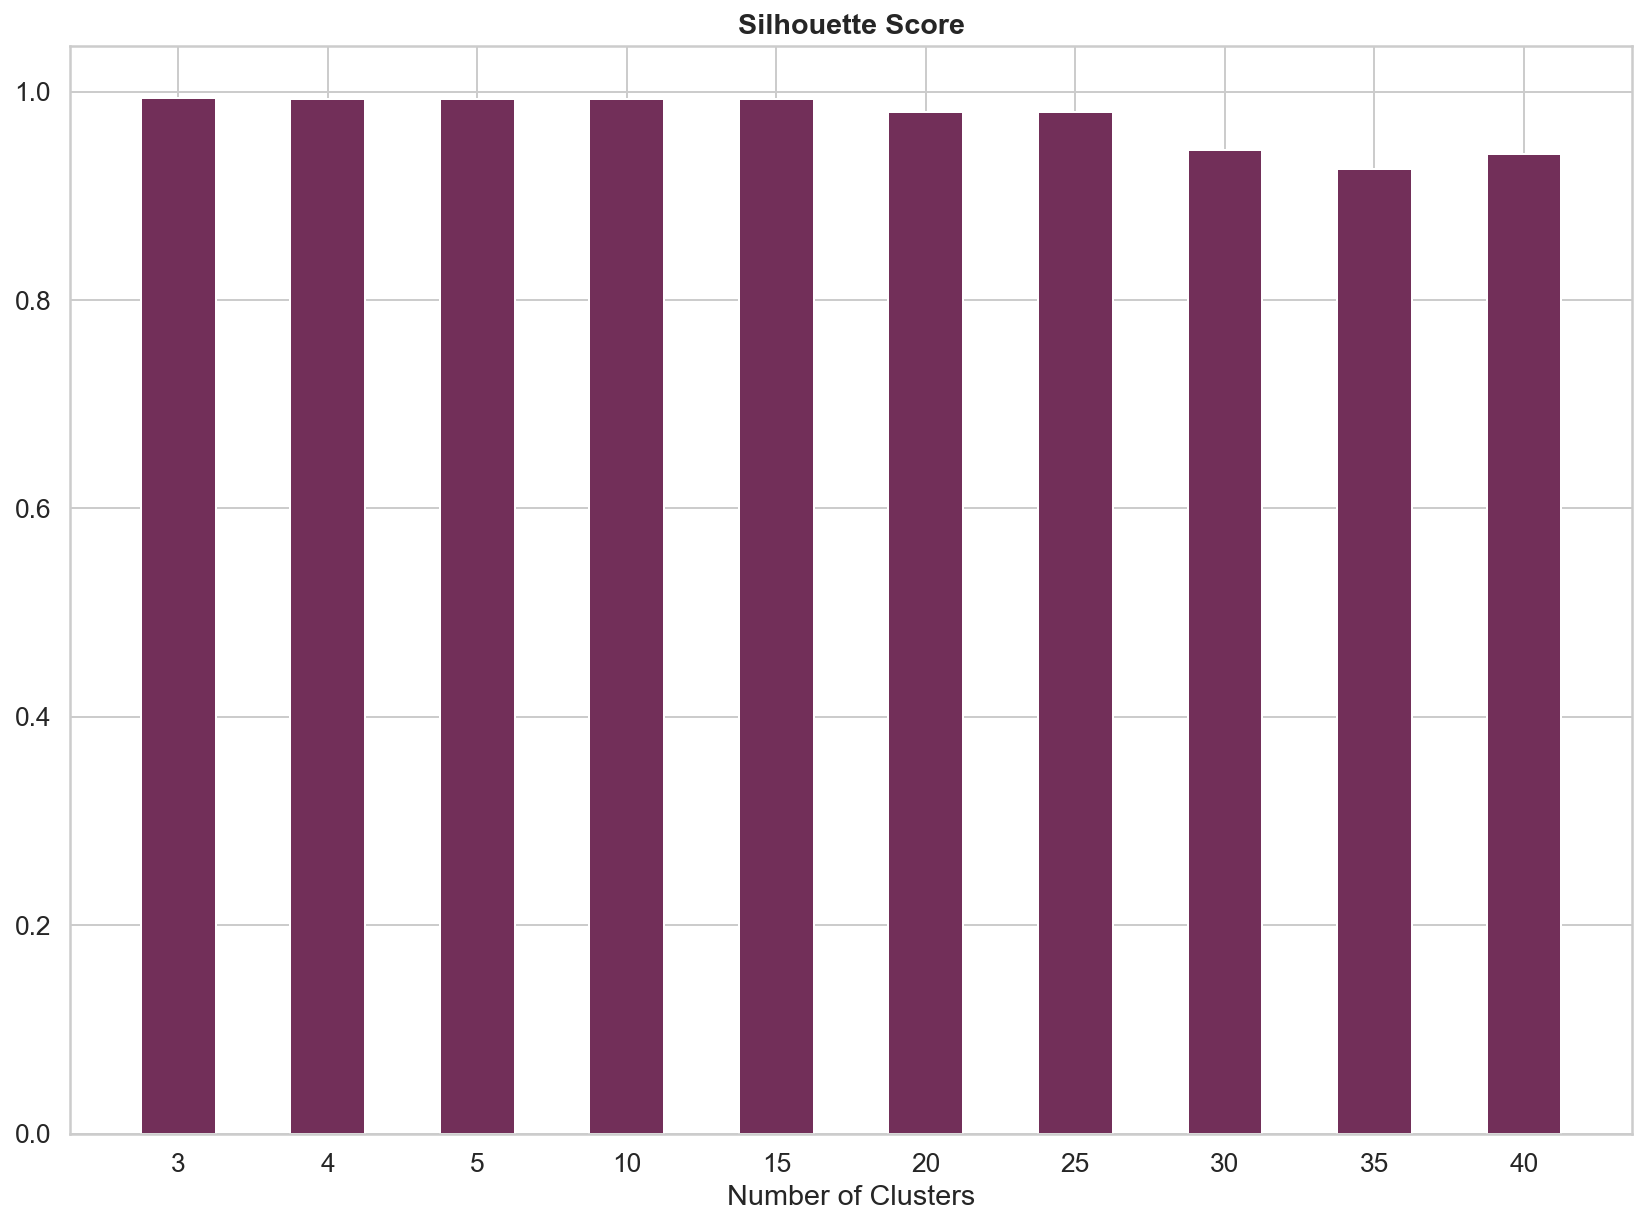

optimum num of clusters = 3


In [630]:
print("\n\n3. HyperTuning the Parameter for KMeans\n")
optimum_num_clusters = kmean_hyper_param_tuning(series_pd_scaled)
print("optimum num of clusters =", optimum_num_clusters)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0        23.6
1        29.6
2        33.1
3        39.3
4        44.1
         ... 
26097     0.5
26098     0.5
26099     0.5
26100     0.4
26101     0.4
Length: 26102, dtype: float64

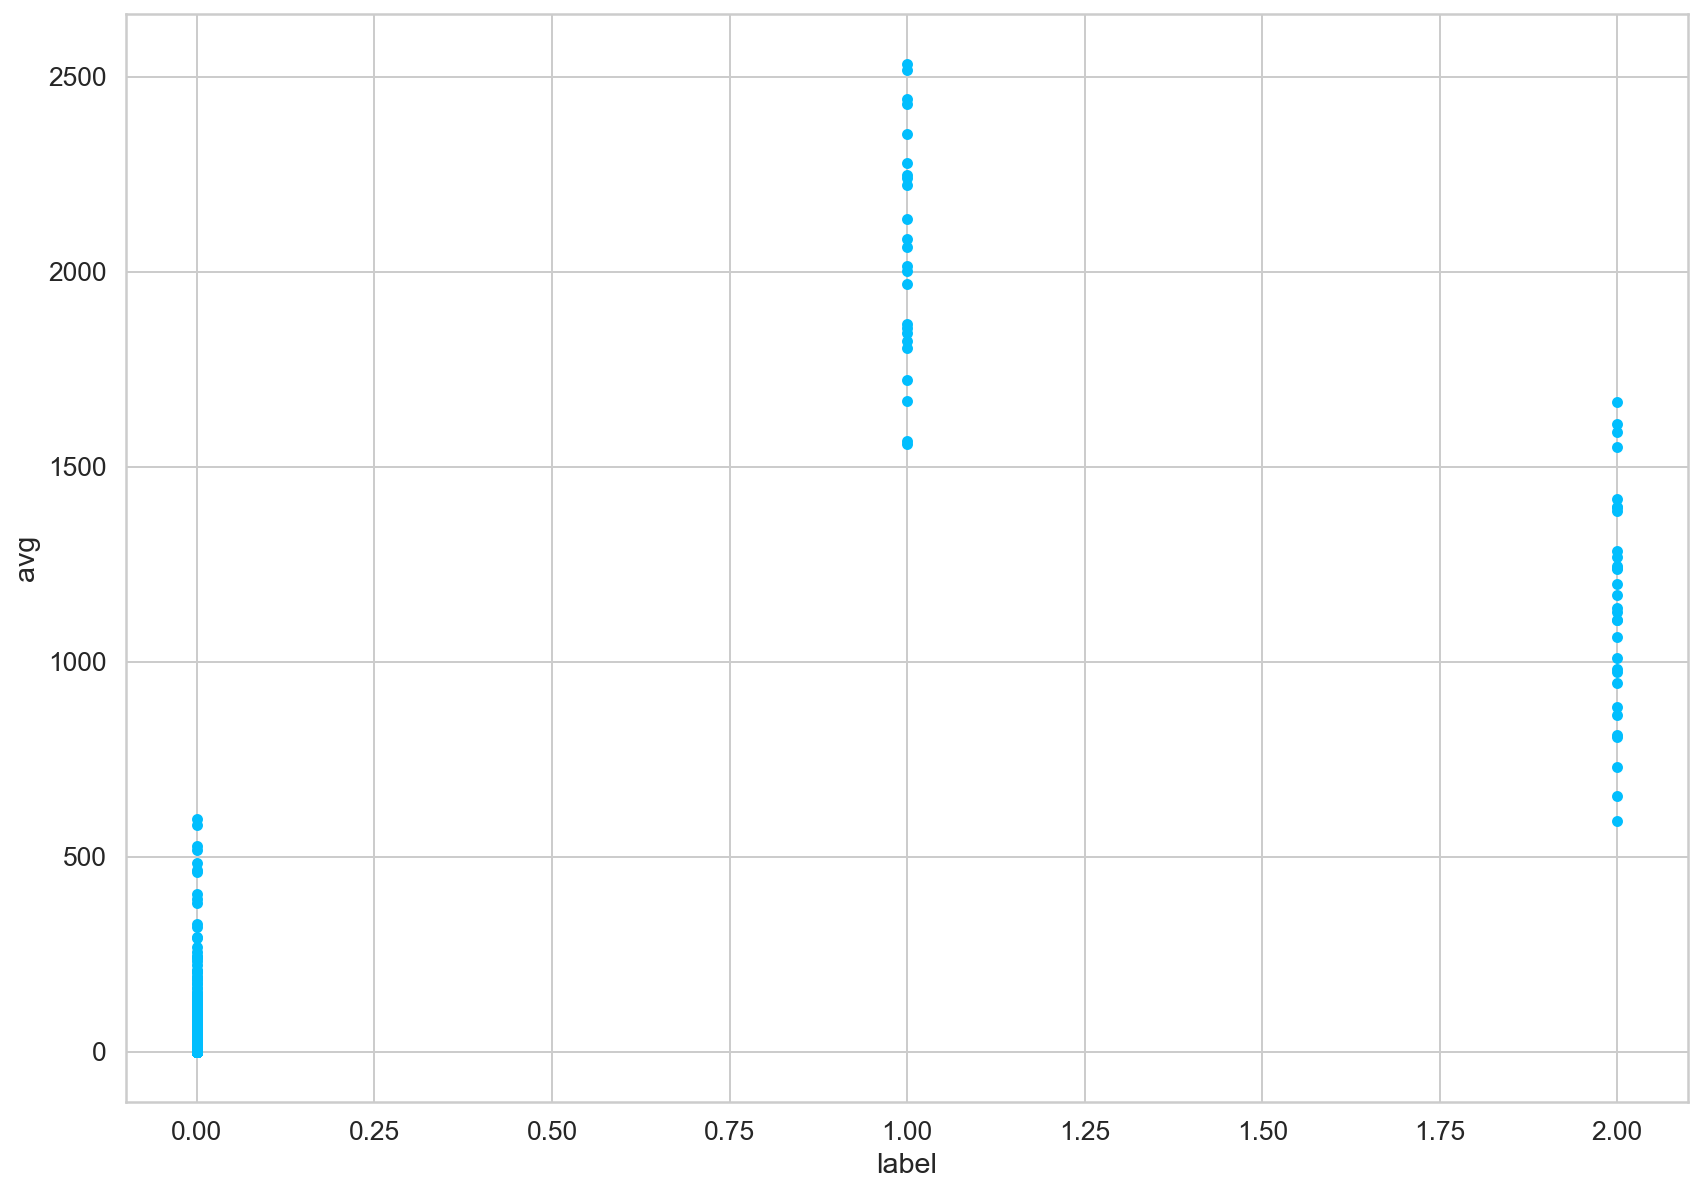

In [631]:
# 验证

avg_list = series_pd.T.mean()
result = kmeans.labels_

test = pd.DataFrame({'label': result, 'avg': avg_list})

test.plot.scatter(x='label', y='avg')

avg_list

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


14232    0.55
14233    1.15
14234    1.55
14235    2.55
14236    3.65
         ... 
14479    0.40
14480    0.35
14481    0.35
14482    0.25
14483    0.10
Length: 252, dtype: float64

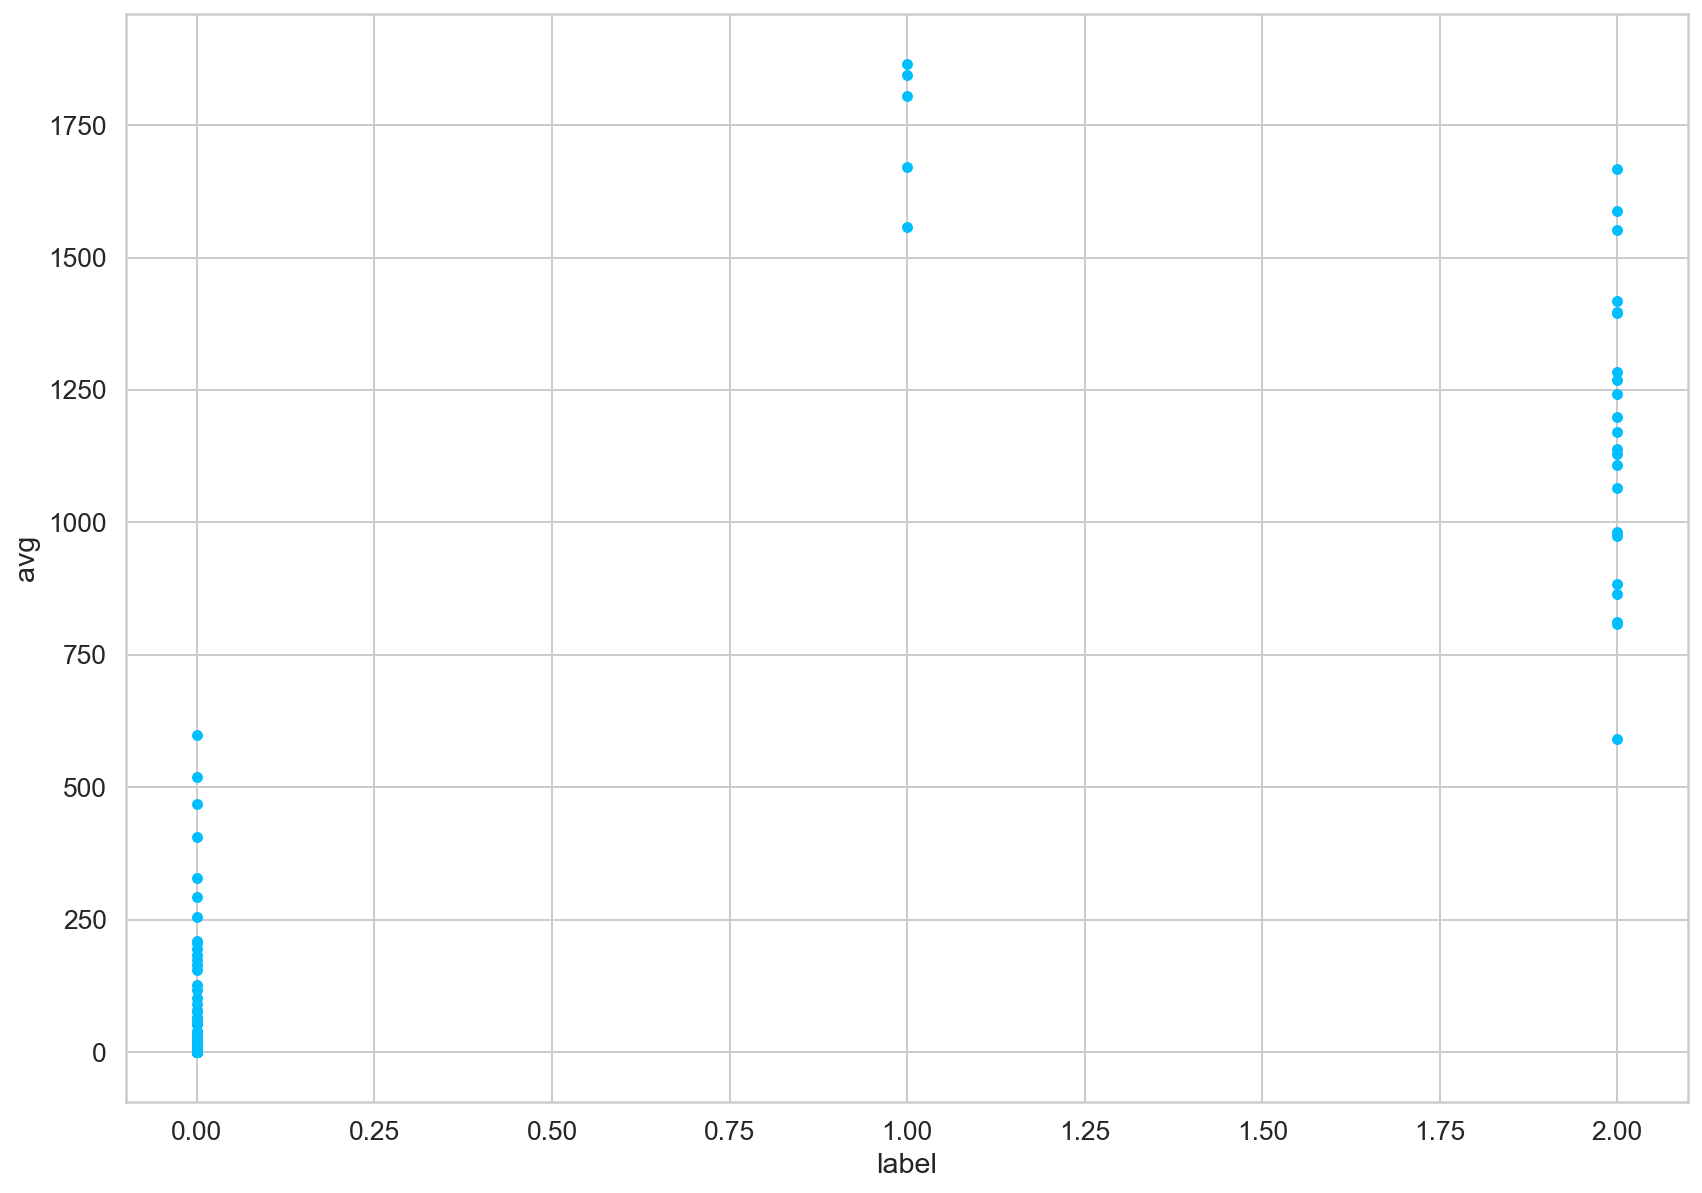

In [632]:
# data_test = pd.DataFrame(test_series[13])
data_test = pd.DataFrame(series_pd[length * 16 + 600: length * 17])

avg_list = data_test.T.mean()
for avg in avg_list:
    if avg > 2000:
        print(avg)
result = kmeans.labels_[length * 16 + 600: length * 17]

test = pd.DataFrame({'label': result, 'avg': avg_list})

test.plot.scatter(x='label', y='avg')

test.T.mean()